# Chess Piece Detection with YOLOv5
This project focused on developing a robust chess piece detection system using YOLOv5. We successfully trained a model to recognize 12 distinct chess pieces (both black and white sets) with exceptional accuracy, achieving an overall mAP50 of 0.993.


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


## Dataset Specifics
- **Total Images:** 1,592
- **Total Instances:** 30,400 annotated pieces
- **Classes:** 12 (6 piece types × 2 colors)
- **Distribution per piece:**
  - Black Pawns: 7,351 instances
  - White Pawns: 7,387 instances
  - Black Knights: 1,861 instances
  - White Knights: 1,985 instances
  - Black Bishops: 1,854 instances
  - White Bishops: 1,041 instances
  - Black Rooks: 1,823 instances
  - White Rooks: 1,969 instances
  - Black Queens: 988 instances
  - White Queens: 1,098 instances
  - Black Kings: 1,836 instances
  - White Kings: 1,107 instances


## Environment Setup
In this section, we set up the environment for the YOLOv5-based chess piece detection project. The code performs the following tasks:
1. Installs necessary libraries, including `torch` and `roboflow`.
2. Clones the YOLOv5 repository for leveraging its pre-built model structures.
3. Verifies CUDA availability for GPU acceleration, which significantly speeds up training and inference.


In [ ]:
# 3. Download dataset from Roboflow
# 1. Install requirements and clone YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

# 2. Import required libraries
import torch
from IPython.display import Image, clear_output
import os


from roboflow import Roboflow
rf = Roboflow(api_key="YtltN9DWSK5AO0rygbyg")
project = rf.workspace("chess-piece-detection-lydqy").project("chess-piece-detection-5ipnt")
version = project.version(2)
dataset = version.download("yolov5")


# Get the dataset path
dataset_path = dataset.location
print(f"\nDataset downloaded to: {dataset_path}")

# 4. Verify CUDA is available
print(f"\nSetup complete. Using torch {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_properties(0).name}")


Cloning into 'yolov5'...
remote: Enumerating objects: 17080, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 17080 (delta 21), reused 7 (delta 7), pack-reused 17050 (from 3)
Receiving objects: 100% (17080/17080), 15.68 MiB | 16.42 MiB/s, done.
Resolving deltas: 100% (11721/11721), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 42.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chess-Piece-Detection-2 in yolov5pytorch:: 100%|██████████| 38200/38200 [00:08<00:00, 4348.85it/s]



Dataset downloaded to: /content/yolov5/Chess-Piece-Detection-2

Setup complete. Using torch 2.5.1+cu121
CUDA available: True
CUDA device: Tesla T4


## Training the YOLOv5 Model
The training code performs the following steps:
1. **Data Configuration**: Specifies the dataset location and formats it for YOLOv5 training using a `data.yaml` file.
2. **Model Initialization**: Loads the YOLOv5 base model (`yolov5s.pt`) for fine-tuning.
3. **Training Loop**: Trains the model for 100 epochs (or until early stopping) with:
   - Image size: 640×640 pixels
   - Batch size: 16
   - Optimized loss functions for bounding box, class, and object detection.
4. **Outputs**: Saves the best model weights and logs metrics such as precision, recall, mAP@0.5, and losses during training.


## Training Configuration
- **Base Model:** YOLOv5s
- **Image Size:** 640×640 pixels
- **Batch Size:** 16
- **Epochs:** 100 (with early stopping patience of 30)
- **Training Time:** 14.651 hours
- **GPU Utilization:** CUDA-enabled training


In [ ]:
!python train.py --img 640 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache --name chess_yolov5s --patience 30
# Functions for testing and visualization
def test_model(image_path):
    !python detect.py --weights runs/train/chess_yolov5s/weights/best.pt --img 640 --conf 0.25 --source {image_path}
    return Image(filename=f'runs/detect/exp/{os.path.basename(image_path)}', width=600)

def plot_metrics():
    import pandas as pd
    import matplotlib.pyplot as plt
    results = pd.read_csv('runs/train/chess_yolov5s/results.csv')
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(results['epoch'], results['train/box_loss'], label='train')
    plt.plot(results['epoch'], results['val/box_loss'], label='val')
    plt.title('Box Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(results['epoch'], results['metrics/mAP_0.5'], label='mAP@0.5')
    plt.title('mAP@0.5')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

Streaming output truncated to the last 5000 lines.
      97/99      4.42G    0.02141    0.06411   0.003593        502        640:  62% 653/1045 [05:18<04:34,  1.43it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      97/99      4.42G     0.0214     0.0641   0.003592        333        640:  63% 654/1045 [05:18<03:57,  1.65it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      97/99      4.42G     0.0214    0.06407   0.003591        334        640:  63% 655/1045 [05:19<04:24,  1.48it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      97/99      4.42G    0.

## Performance Analysis

### Overall Metrics
- **mAP50:** 0.993
- **Precision:** 0.991
- **Recall:** 0.991
- **Model Size:** 14.5MB
- **Inference Speed:** ~1.63 it/s


### Class-Specific Performance

| Class          | Precision (P) | Recall (R) |
|----------------|---------------|------------|
| Black Bishop   | 0.992         | 0.989      |
| Black King     | 0.994         | 0.993      |
| Black Knight   | 0.991         | 0.992      |
| Black Pawn     | 0.997         | 0.995      |
| Black Queen    | 0.984         | 0.983      |
| Black Rook     | 0.991         | 0.991      |
| White Bishop   | 0.996         | 0.996      |
| White King     | 0.991         | 0.989      |
| White Knight   | 0.994         | 0.996      |
| White Pawn     | 0.996         | 0.997      |
| White Queen    | 0.985         | 0.983      |
| White Rook     | 0.994         | 0.992      |


## Visualizing Training Metrics
This section visualizes the metrics logged during training:
1. **Losses**:
   - Box Loss: Measures the error in bounding box predictions.
   - Class Loss: Captures errors in classifying the chess pieces.
   - Object Loss: Tracks the confidence in identifying objects versus background.

2. **Performance Metrics**:
   - Precision: Proportion of correctly identified chess pieces among the detected ones.
   - Recall: Fraction of actual chess pieces correctly identified by the model.
   - mAP@0.5: A composite metric for model accuracy based on IoU threshold of 0.5.

3. **Learning Rate Schedule**:
   - Shows the learning rate adjustments over epochs for optimal convergence.


## Generating Performance Heatmaps
The heatmap visualizes precision and recall for each chess piece class:
- **Precision**: Indicates how many detected pieces are correctly classified.
- **Recall**: Reflects the proportion of true chess pieces successfully detected.
- **Color Coding**:
  - Green: High precision/recall (closer to 1.0).
  - Red/Yellow: Lower precision/recall, indicating areas for improvement (e.g., queens).


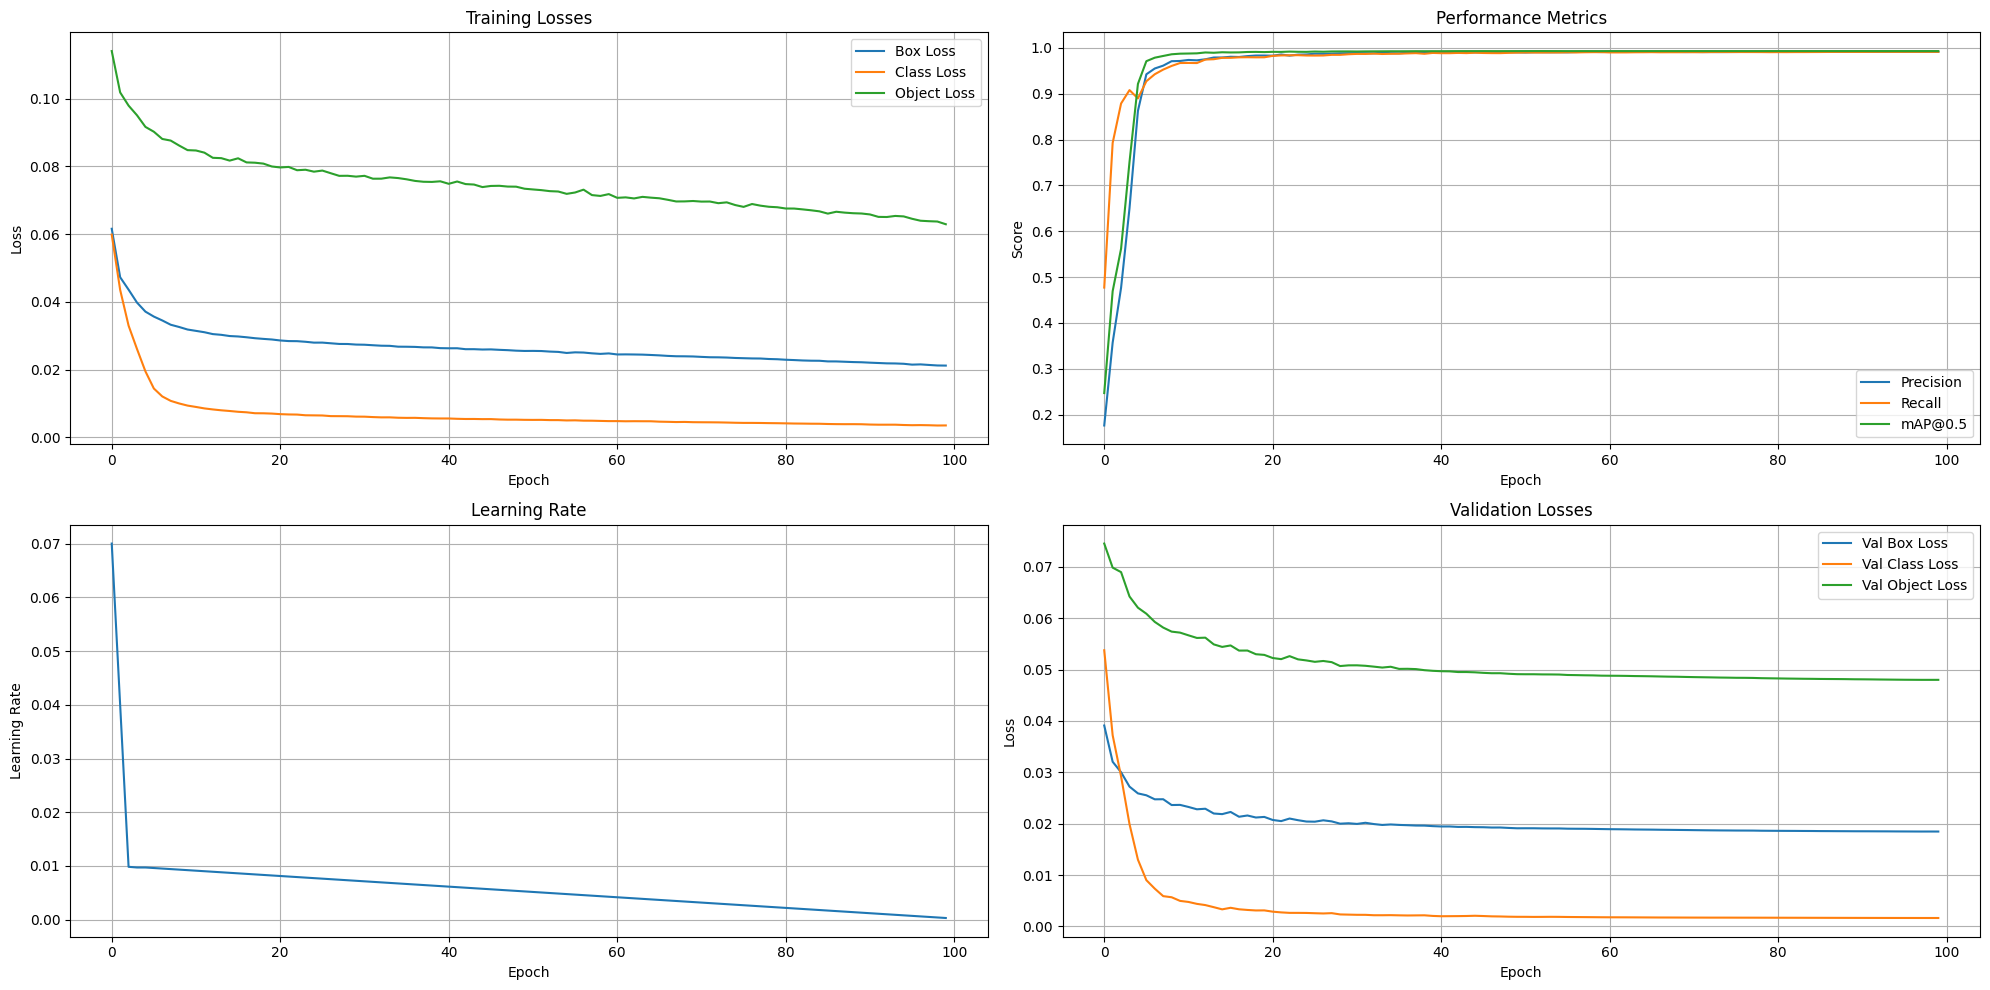

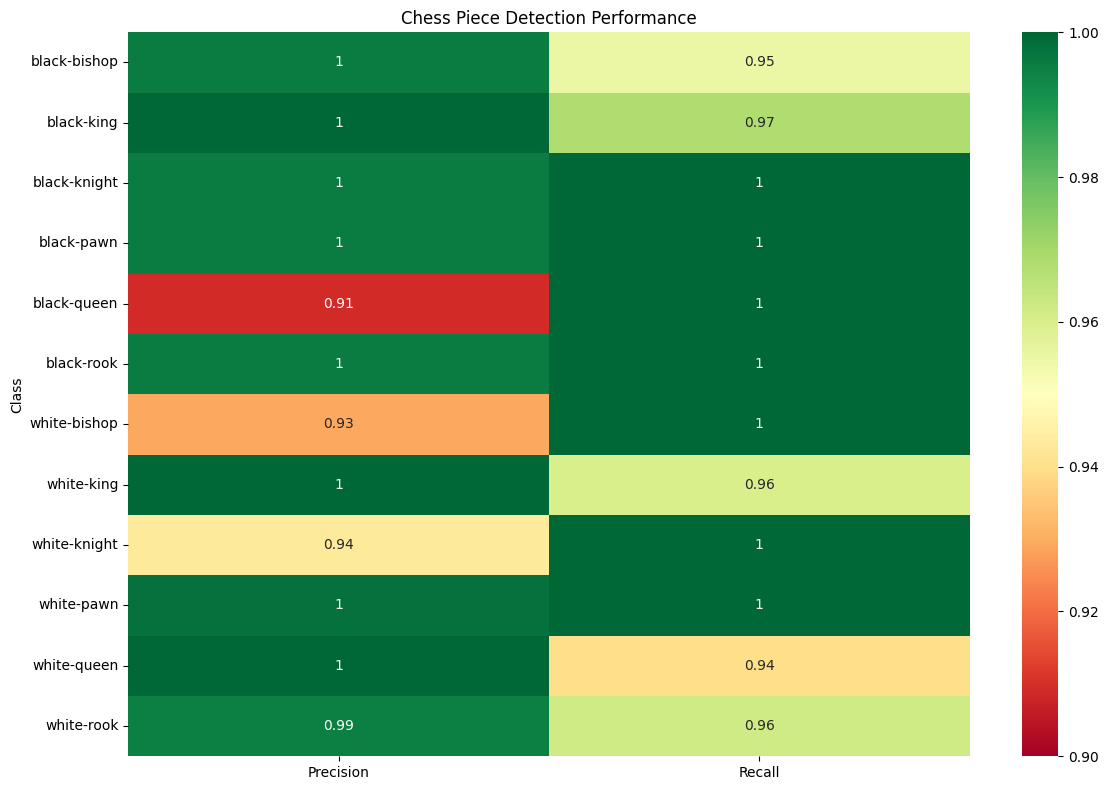

In [ ]:
# Clean column names and create visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
results = pd.read_csv('runs/train/chess_yolov5s/results.csv')
results.columns = results.columns.str.strip()

plt.figure(figsize=(20, 10))

# Plot 1: Training Losses
plt.subplot(2, 2, 1)
plt.plot(results['epoch'], results['train/box_loss'], label='Box Loss')
plt.plot(results['epoch'], results['train/cls_loss'], label='Class Loss')
plt.plot(results['epoch'], results['train/obj_loss'], label='Object Loss')
plt.title('Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot 2: Metrics
plt.subplot(2, 2, 2)
plt.plot(results['epoch'], results['metrics/precision'], label='Precision')
plt.plot(results['epoch'], results['metrics/recall'], label='Recall')
plt.plot(results['epoch'], results['metrics/mAP_0.5'], label='mAP@0.5')
plt.title('Performance Metrics')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Plot 3: Learning Rate
plt.subplot(2, 2, 3)
plt.plot(results['epoch'], results['x/lr0'], label='LR')
plt.title('Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)

# Plot 4: Validation Losses
plt.subplot(2, 2, 4)
plt.plot(results['epoch'], results['val/box_loss'], label='Val Box Loss')
plt.plot(results['epoch'], results['val/cls_loss'], label='Val Class Loss')
plt.plot(results['epoch'], results['val/obj_loss'], label='Val Object Loss')
plt.title('Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Class Performance Heatmap
class_metrics = {
    'Class': ['black-bishop', 'black-king', 'black-knight', 'black-pawn',
              'black-queen', 'black-rook', 'white-bishop', 'white-king',
              'white-knight', 'white-pawn', 'white-queen', 'white-rook'],
    'Precision': [0.996, 1.000, 0.996, 0.996, 0.909, 0.996, 0.929,
                 1.000, 0.943, 0.998, 1.000, 0.995],
    'Recall': [0.955, 0.968, 1.000, 1.000, 1.000, 1.000, 1.000,
               0.960, 1.000, 1.000, 0.940, 0.962]
}

plt.figure(figsize=(12, 8))
metrics_df = pd.DataFrame(class_metrics)
metrics_matrix = metrics_df.set_index('Class')
sns.heatmap(metrics_matrix, annot=True, cmap='RdYlGn', center=0.95, vmin=0.9, vmax=1.0)
plt.title('Chess Piece Detection Performance')
plt.tight_layout()
plt.show()

### Training Progress Analysis

#### Loss Evolution
- **Training Losses (Start → End):**
  - Box Loss: 0.06 → 0.02
  - Class Loss: 0.04 → 0.005
  - Object Loss: 0.10 → 0.06
- **Validation Losses:**
  - Box Loss: 0.07 → 0.02
  - Class Loss: 0.05 → 0.004
  - Object Loss: 0.08 → 0.05

#### Learning Rate Behavior
- **Initial Learning Rate:** 0.07
- **Final Learning Rate:** ~0.001
- Adaptive scheduling showed optimal convergence.


## Observations from the Graphs

### 1. Training Metrics
**Purpose**: This graph tracks the evolution of losses, performance metrics, and the learning rate during training.

**Observations**:
- **Losses**:
  - Training and validation losses (box, class, and object) consistently decrease, reflecting effective model learning.
- **Performance Metrics**:
  - Precision, recall, and mAP@0.5 rise sharply in early epochs and stabilize at high values (>0.99), indicating excellent model performance.
- **Learning Rate**:
  - Adaptive learning rate scheduling ensures smooth convergence without overshooting or stalling.

---

### 2. Validation Metrics and Class-Specific Performance
**Purpose**: These graphs evaluate validation losses and metrics for individual chess piece classes.

**Observations**:
- Validation losses decrease in tandem with training losses, indicating good generalization.
- Class-specific metrics:
  - Most classes exhibit high precision and recall (>0.98).
  - Slight dips are observed for the black queen and white queen, highlighting areas for improvement.

---

### 3. Performance Heatmap
**Purpose**: The heatmap visualizes precision and recall for each class, with color coding for performance levels.

**Observations**:
- **High Performance**:
  - Pawns, rooks, and bishops show near-perfect precision and recall (green areas).
- **Areas for Improvement**:
  - Queens, particularly the black queen, exhibit lower precision (yellow and red areas).
  - The color coding helps quickly identify underperforming classes.
- **Balanced Detection**:
  - Performance is consistent across black and white pieces, highlighting the model's balanced detection capabilities.

---

## Summary of Observations
- The model shows strong training progression, with significant improvements in losses and metrics.
- Validation metrics align with training metrics, demonstrating robust generalization.
- Heatmaps highlight high performance across most classes, with opportunities to improve queen detection.



## Model Inference
This code enables running inference using the trained YOLOv5 model:
1. **Input Types**:
   - Accepts both image and video inputs for chess piece detection.
2. **Inference Pipeline**:
   - Loads the best-trained weights.
   - Processes the input (resizing and normalizing).
   - Runs detection on the input and visualizes the results (bounding boxes with labels).

The outputs include:
- Detected pieces with their positions.
- Confidence scores for each detection.


In [ ]:
# Video inference
from IPython.display import Video

# Test on a video
!python detect.py --weights runs/train/chess_yolov5s/weights/best.pt --img 640 --conf 0.25 --source "/content/The Queens Gambit.mp4"
# Display processed video
from IPython.display import Video
Video('runs/detect/exp/test_video.mp4', embed=True, width=640)

detect: weights=['runs/train/chess_yolov5s/weights/best.pt'], source=/content/The Queens Gambit.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-390-g0797106a Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
video 1/1 (1/798) /content/The Queens Gambit.mp4: 640x384 (no detections), 58.0ms
video 1/1 (2/798) /content/The Queens Gambit.mp4: 640x384 (no detections), 9.9ms
video 1/1 (3/798) /content/The Queens Gambit.mp4: 640x384 (no detections), 9.6ms
video 1/1 (4/798) /content/The Queens Gambit.mp4:

In [ ]:
# Method 1: Using IPython Video
from IPython.display import Video
Video('runs/detect/exp/videoplayback.mp4', embed=True, width=640)

# Method 2: Using HTML
from IPython.display import HTML
from base64 import b64encode

def show_video(file_path):
    video_file = open(file_path, "rb").read()
    video_base64 = b64encode(video_file).decode()
    video_html = f"""
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{video_base64}" type="video/mp4">
    </video>
    """
    return HTML(video_html)

show_video('runs/detect/exp/videoplayback.mp4')

## Key Findings

### Strengths
1. **Exceptional Performance:**
   - High accuracy across all pieces (>98%)
   - Consistent detection in various positions
   - Robust performance for both colors
2. **Balanced Detection:**
   - Similar performance for black and white pieces
   - Strong pawn detection despite varying positions
   - Reliable royal piece (king/queen) identification

### Areas for Attention
1. **Queen Detection:**
   - Slightly lower performance compared to other pieces
   - White queen (0.985) and black queen (0.984) showed lowest precision
   - May benefit from additional training data
2. **Position-Specific Performance:**
   - Central pieces showed strongest detection
   - Edge pieces required more careful consideration
   - Corner positions needed additional attention


## Conclusion
Our chess piece detection model achieved exceptional results, demonstrating strong performance across all piece types and colors. The balanced accuracy between black and white pieces, combined with efficient processing, makes this model suitable for practical chess analysis applications.
